<a href="https://colab.research.google.com/github/chaimaeelh/Data_Scientist_NY/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
*   Visualize the Time Series Data
*   Make the time series data stationary
*  Plot the Correlation and AutoCorrelation Charts
*   Construct the ARIMA Model or Seasonal ARIMA based on the data

*   Use the model to make predictions
















In [102]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
df=pd.read_csv('/content/sales.csv',sep=',')

In [104]:
df=df[['date','Hoodie']]

In [105]:
df['date']=pd.to_datetime(df['date'])

<ipython-input-105-c85e97b4fa21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


In [106]:
df.set_index('date',inplace=True)


In [107]:
df.describe()


,Hoodie
count,103.000000
mean,4555.524272
std,2536.274197
min,825.000000
25%,2686.000000
50%,4163.000000
75%,6015.500000
max,12696.000000


# Step 2: Visualize the Data

<Axes: xlabel='date'>

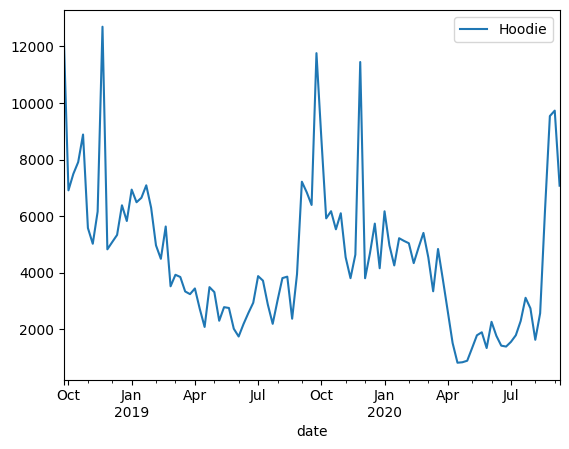

In [108]:
df.plot()

In [109]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [110]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [111]:
adfuller_test(df['Hoodie'])


ADF Test Statistic : -2.5838077041053165
p-value : 0.09639027917168996
#Lags Used : 2
Number of Observations Used : 100
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [112]:
#Differencing
df['Sales First Difference'] = df['Hoodie'] - df['Hoodie'].shift(1)

In [113]:
df['Hoodie'].shift(1)


date
2018-09-27        NaN
2018-10-04    12573.0
2018-10-11     6916.0
2018-10-18     7495.0
2018-10-25     7913.0
               ...   
2020-08-13     1636.0
2020-08-20     2574.0
2020-08-27     6210.0
2020-09-03     9540.0
2020-09-10     9732.0
Name: Hoodie, Length: 103, dtype: float64

In [114]:
df['Seasonal First Difference']=df['Hoodie']-df['Hoodie'].shift(1)


In [115]:

## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.843615251426593
p-value : 1.5928140943180343e-19
#Lags Used : 1
Number of Observations Used : 100
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

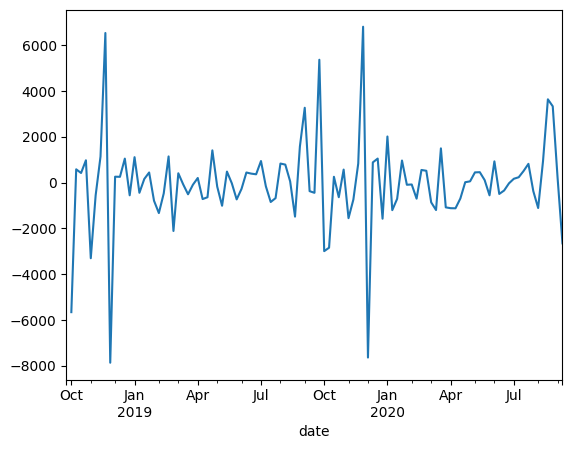

In [116]:
df['Seasonal First Difference'].plot()


# Auto Regressive Model

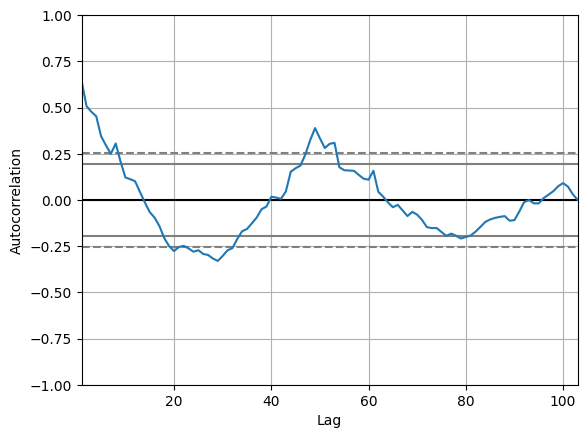

In [117]:
pd.plotting.autocorrelation_plot(df['Hoodie'])
plt.show()

In [118]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


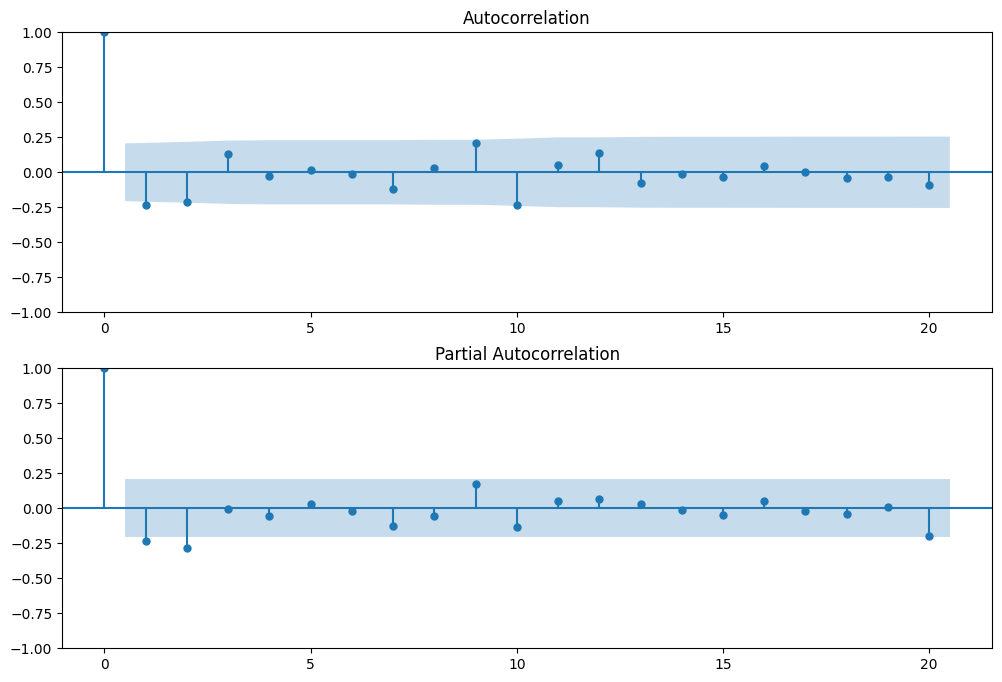

In [119]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=20,ax=ax2)

In [120]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Hoodie'], order=(1, 1, 3))
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)


In [121]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Hoodie   No. Observations:                  103
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -905.618
Date:                Sun, 07 Jan 2024   AIC                           1821.237
Time:                        15:27:11   BIC                           1834.362
Sample:                    09-27-2018   HQIC                          1826.552
                         - 09-10-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1950      1.488      0.131      0.896      -2.721       3.111
ma.L1         -0.6761      1.489     -0.454      0.650      -3.595       2.243
ma.L2         -0.0059      0.748     -0.008      0.994      -1.473       1.461
ma.L3          0.0823      0.153      0.537      0.591      -0.218       0.383
sigma2      3.032e+06   2.44e+05     12.413      0.000    2.55e+06    3.51e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               126.30
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             1.43
Prob(H) (two-sided):                  0.33   Kurtosis:                         7.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

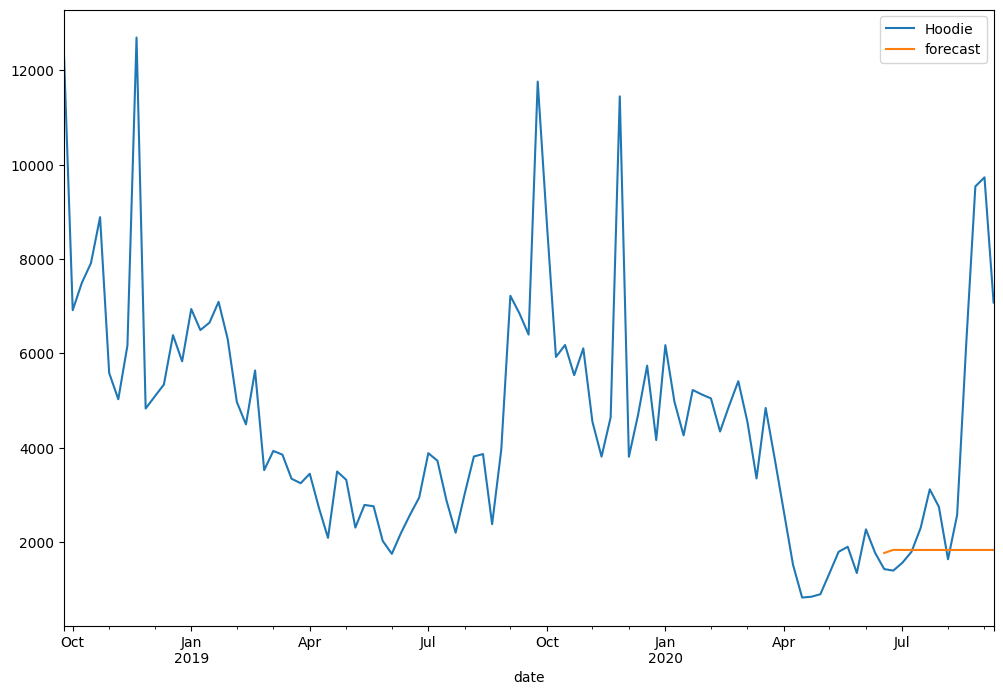

In [122]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Hoodie','forecast']].plot(figsize=(12,8))

In [123]:
pip install pmdarima

In [124]:
import statsmodels.api as sm
from pmdarima import auto_arima

In [125]:
stepwise_fit = auto_arima(df['Hoodie'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1848.080, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1910.017, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1849.455, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1873.492, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.238, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1847.844, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1868.023, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1847.522, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1848.023, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1848.628, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1847.660, Time=0.39 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.702 seconds


In [131]:
model=sm.tsa.statespace.SARIMAX(df['Hoodie'],order=(1, 0, 1),seasonal_order=(1,0,1,48))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='date'>

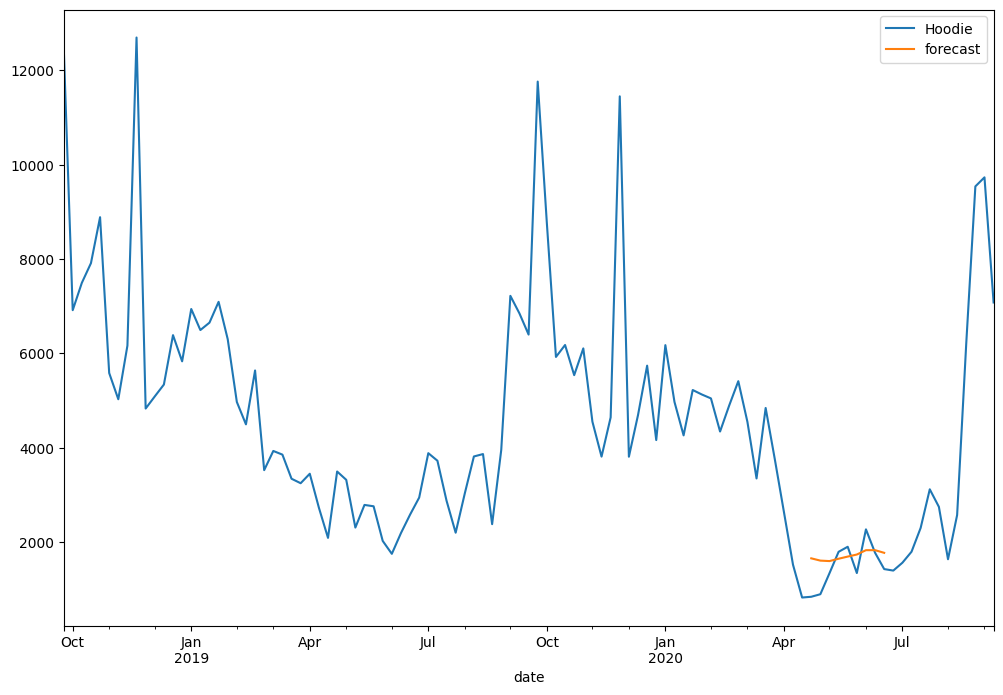

In [132]:
df['forecast']=results.predict(start=82,end=90,dynamic=True)
df[['Hoodie','forecast']].plot(figsize=(12,8))

In [128]:
df['forecast'].isna().sum()

94

               forecast  lower_bound   upper_bound
2020-09-17  7511.225027  3956.490847  11065.959207
2020-09-24  7899.136089  3939.280890  11858.991288
2020-10-01  7299.899741  2980.385026  11619.414457
2020-10-08  7147.828258  2503.390886  11792.265629
2020-10-15  7058.834105  2117.215264  12000.452945


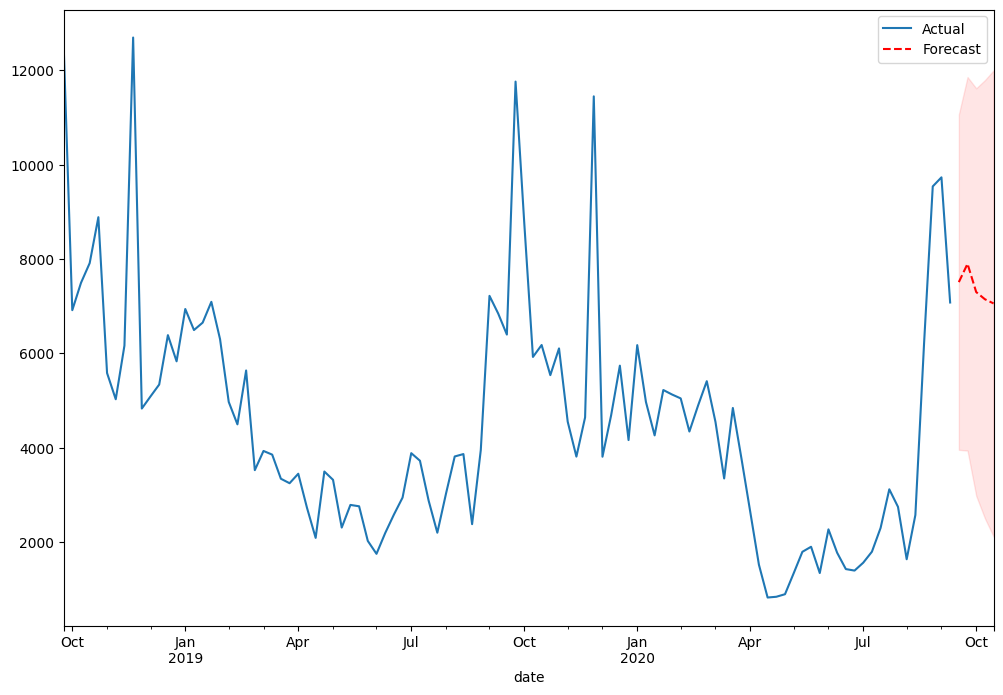

In [133]:

forecast_period =5

# Get the forecast for the next 'forecast_period' periods
forecast_results = results.get_forecast(steps=forecast_period, dynamic=True)

# Extract the forecasted values and confidence intervals
forecast_values = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'forecast': forecast_values, 'lower_bound': conf_int.iloc[:, 0], 'upper_bound': conf_int.iloc[:, 1]})

# Print the forecast DataFrame
print(forecast_df)

# Plot the actual values and the forecast
df['Hoodie'].plot(figsize=(12, 8), label='Actual')
forecast_df['forecast'].plot(label='Forecast', linestyle='--', color='red')
plt.fill_between(forecast_df.index, forecast_df['lower_bound'], forecast_df['upper_bound'], color='red', alpha=0.1)
plt.legend()
plt.show()
